<a href="https://colab.research.google.com/github/bugcaps/workjob/blob/main/%EC%8B%A4%EA%B1%B0%EB%9E%98%EA%B0%80%EB%B6%84%EC%84%9D_%EC%84%9C%EC%9A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 서울 실거래가 조회
* 참조데이터 : 국도교통부 실거래가 자료공개 데이터 cvs 1년단위 download
  * http://rtdown.molit.go.kr/

In [ ]:
#한글폰트설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [2]:
# 드라이브  연결
from google.colab import drive
drive.mount('/content/drvie') 

Drive already mounted at /content/drvie; to attempt to forcibly remount, call drive.mount("/content/drvie", force_remount=True).


In [3]:
!ls /content/drvie/MyDrive/apartHome/실거래가

'아파트(매매)__실거래가_2019_서울.csv'
'아파트(매매)__실거래가_2019_경기도.csv'
'아파트(매매)__실거래가_2020_서울.csv'
'아파트(매매)__실거래가_2020_경기도.csv'
'아파트(매매)__실거래가_2021_서울.csv'
'아파트(매매)__실거래가_2021_경기도.csv'
 2021_성동구.csv


In [16]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')   ##한글 폰트설정
import pandas as pd

df = pd.read_csv('/content/drvie/MyDrive/apartHome/실거래가/아파트(매매)__실거래가_2021_서울.csv',encoding='CP949')
df.drop("해제사유발생일", axis=1,inplace=True) ## axis=1 열, 0 행을 의미한다. inplace=True 현재 객체에 설정하는 option
#df.set_index("단지명" , inplace=True)  
display(df)
display(df.columns)

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,거래유형,중개사소재지
0,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),77.75,202104,15,"174,000",9,1988.0,언주로 103,-,-
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202105,15,"195,000",5,1987.0,언주로 3,-,-
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202108,11,"200,000",3,1987.0,언주로 3,-,-
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202109,2,"220,000",2,1987.0,언주로 3,-,-
4,서울특별시 강남구 개포동,1282,1282.0,0.0,개포래미안포레스트,74.66,202101,17,"245,000",7,2020.0,개포로 264,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42632,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),57.66,202102,27,"30,500",5,2003.0,동일로144길 74,-,-
42633,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),84.69,202111,4,"50,000",2,2003.0,동일로144길 74,중개거래,"서울 송파구, 서울 중랑구"
42634,서울특별시 중랑구 중화동,274-75,274.0,75.0,한영(102),72.22,202105,4,"49,500",4,2003.0,동일로144길 74,-,-
42635,서울특별시 중랑구 중화동,274-76,274.0,76.0,한영(103),58.46,202107,1,"30,000",2,2003.0,동일로144길 74,-,-


Index(['시군구', '번지', '본번', '부번', '단지명', '전용면적(㎡)', '계약년월', '계약일', '거래금액(만원)',
       '층', '건축년도', '도로명', '거래유형', '중개사소재지'],
      dtype='object')

## 실거래가 데이터 확인
* 전체 csv 화일에서 필요항목만 추출
  * 시군구','번지','도로명', '단지명','전용면적(㎡)','계약년월','계약일','거래금액(만원)
  * group 항목 추가 : 전용면적을 10단위로 블럭화

In [71]:
def exportGu(df,검색구명):
  ''' 검색하려는 구를 추출하여 컬럼을 동일하게 정의 '''
  temp =df.filter(items=['시군구','번지','도로명', '단지명','전용면적(㎡)','계약년월','계약일','거래금액(만원)'])
  temp.rename(columns = {'전용면적(㎡)' : '전용면적','거래금액(만원)':'금액'}, inplace = True)
  검색구 = temp[temp.시군구.str.contains(검색구명)].copy()
  ## 데이터 전처리
  labels = ["{0} - {1}".format(i, i + 9) for i in range(0, 200, 10)]
  검색구['계약년월'] =pd.to_datetime(검색구['계약년월'], format='%Y%m', errors='ignore')
  검색구["group"] = pd.cut(검색구['전용면적'], range(0, 205, 10), right=False, labels=labels)
  검색구["동"] = 검색구.시군구.str.split(" ").str[2]
  검색구["주소"]=검색구['시군구'] +' ' + 검색구['도로명']
  검색구['금액']= pd.to_numeric(검색구['금액'].str.replace(',', ''))  ## 숫자로변환
  검색구=검색구.filter(items=['동', '단지명','group','전용면적','계약년월','계약일','금액','주소'])
  ##검색구.reset_index()
  return 검색구

In [72]:
test = exportGu(df,'용산구')
test

,동,단지명,group,전용면적,계약년월,계약일,금액,주소
37499,도원동,삼성래미안,80 - 89,84.69,2021-01-01,6,130000,서울특별시 용산구 도원동 새창로 70
37500,도원동,삼성래미안,50 - 59,59.94,2021-01-01,7,102000,서울특별시 용산구 도원동 새창로 70
37501,도원동,삼성래미안,50 - 59,59.94,2021-01-01,18,114000,서울특별시 용산구 도원동 새창로 70
37502,도원동,삼성래미안,50 - 59,59.94,2021-01-01,30,115000,서울특별시 용산구 도원동 새창로 70
37503,도원동,삼성래미안,80 - 89,84.69,2021-02-01,21,126000,서울특별시 용산구 도원동 새창로 70
...,...,...,...,...,...,...,...,...
38379,후암동,후암,80 - 89,84.11,2021-11-01,25,65000,서울특별시 용산구 후암동 후암로22길 10
38380,후암동,후암맨션,70 - 79,72.13,2021-03-01,25,60000,서울특별시 용산구 후암동 후암로44길 8
38381,후암동,후암맨션,70 - 79,72.13,2021-11-01,4,74500,서울특별시 용산구 후암동 후암로44길 8
38382,후암동,후암미주,60 - 69,64.26,2021-01-01,28,110000,서울특별시 용산구 후암동 후암로 71-1


In [73]:
성동구df = exportGu(df,'성동구')
성동구df

,동,단지명,group,전용면적,계약년월,계약일,금액,주소
27948,금호동1가,금호삼성래미안,80 - 89,84.45,2021-01-01,16,123000,서울특별시 성동구 금호동1가 독서당로 343
27949,금호동1가,금호삼성래미안,80 - 89,84.45,2021-01-01,30,125000,서울특별시 성동구 금호동1가 독서당로 343
27950,금호동1가,금호삼성래미안,110 - 119,114.67,2021-04-01,3,157500,서울특별시 성동구 금호동1가 독서당로 343
27951,금호동1가,금호삼성래미안,50 - 59,59.95,2021-06-01,16,117000,서울특별시 성동구 금호동1가 독서당로 343
27952,금호동1가,금호삼성래미안,80 - 89,84.45,2021-06-01,26,134000,서울특별시 성동구 금호동1가 독서당로 343
...,...,...,...,...,...,...,...,...
29432,행당동,행당한진타운,50 - 59,59.96,2021-11-01,18,109000,서울특별시 성동구 행당동 행당로 82
29433,행당동,행당한진타운,110 - 119,114.62,2021-11-01,21,145000,서울특별시 성동구 행당동 행당로 82
29434,행당동,행당한진타운,110 - 119,114.62,2021-11-01,24,160000,서울특별시 성동구 행당동 행당로 82
29435,행당동,행당한진타운,50 - 59,59.96,2021-12-01,4,115500,서울특별시 성동구 행당동 행당로 82


In [8]:
#csv 파일 생성
#성동구df.to_csv("/content/drvie/MyDrive/apartHome/실거래가/2021_성동구.csv")


In [74]:
!ls /content/drvie/MyDrive/apartHome/실거래가

'아파트(매매)__실거래가_2019_서울.csv'
'아파트(매매)__실거래가_2019_경기도.csv'
'아파트(매매)__실거래가_2020_서울.csv'
'아파트(매매)__실거래가_2020_경기도.csv'
'아파트(매매)__실거래가_2021_서울.csv'
'아파트(매매)__실거래가_2021_경기도.csv'
 2021_성동구.csv


## 2021 성동구 아파트별 평형별 거래가 많은 top 50

In [75]:
## 평형별 
whereprice_group = 성동구df['group'].groupby([성동구df['동'],성동구df['단지명']])
#whereprice_group = 성동구df['group'].groupby([성동구df['계약년월']])
#whereprice_group.describe()
## 거래가 활방한 지역으로 정렬한다.
whereprice_group = whereprice_group.describe().sort_values('count', ascending=False).head(20)
whereprice_group.style
# # whereprice_group['count','top'].plot()
# whereprice_group.plot.scatter(x="top", y="count");


## 1년간 거래가 많았던 평형 및 거래량(top 5)
* 전용면적 : 80~89(25평형)이 제일 거래가 많음으로 분석기준으로 한다. 

In [11]:
whereprice_group = 성동구df['단지명'].groupby([성동구df['group']])
whereprice_group = whereprice_group.describe().sort_values('count', ascending=False).head(5)
whereprice_group.style

,count,unique,top,freq
group,,,,
80 - 89,534,91,대림e-편한세상,29
50 - 59,527,64,행당한진타운,34
110 - 119,168,37,행당한진타운,21
70 - 79,54,16,금호현대,8
60 - 69,33,11,왕십리KCC스위첸,6


In [76]:
전용면적25 =성동구df.query('group== "80 - 89"')
전용면적25

,동,단지명,group,전용면적,계약년월,계약일,금액,주소
27948,금호동1가,금호삼성래미안,80 - 89,84.45,2021-01-01,16,123000,서울특별시 성동구 금호동1가 독서당로 343
27949,금호동1가,금호삼성래미안,80 - 89,84.45,2021-01-01,30,125000,서울특별시 성동구 금호동1가 독서당로 343
27952,금호동1가,금호삼성래미안,80 - 89,84.45,2021-06-01,26,134000,서울특별시 성동구 금호동1가 독서당로 343
27958,금호동1가,금호삼성래미안,80 - 89,84.45,2021-10-01,22,136000,서울특별시 성동구 금호동1가 독서당로 343
27960,금호동1가,벽산,80 - 89,84.82,2021-02-01,6,128000,서울특별시 성동구 금호동1가 금호로 100
...,...,...,...,...,...,...,...,...
29419,행당동,행당한진타운,80 - 89,84.71,2021-08-01,18,144000,서울특별시 성동구 행당동 행당로 82
29420,행당동,행당한진타운,80 - 89,84.71,2021-08-01,21,143000,서울특별시 성동구 행당동 행당로 82
29425,행당동,행당한진타운,80 - 89,84.71,2021-09-01,16,147000,서울특별시 성동구 행당동 행당로 82
29426,행당동,행당한진타운,80 - 89,84.71,2021-09-01,30,146000,서울특별시 성동구 행당동 행당로 82


In [77]:
#전용면적25.plot.scatter(x="계약년월",y="전용면적")
function_list = ['count', 'std', 'mean', 'min', 'max'] #size: 데이터 크기, std:표준편차
월동평균 = 전용면적25.groupby(['계약년월','동'])['금액'].agg(function_list).sort_values('mean', ascending=False).reset_index()
월동평균.round(0)
#df.groupby(['gender','region'])['height'].agg(**{'mean_height':'mean'}).reset_index() ## 성별 & 지역별 키 최대값

,계약년월,동,count,std,mean,min,max
0,2021-06-01,성수동1가,7,84570.0,211643.0,143000,350000
1,2021-02-01,성수동1가,2,115258.0,208500.0,127000,290000
2,2021-01-01,성수동1가,3,82614.0,205000.0,150000,300000
3,2021-09-01,옥수동,3,6028.0,204333.0,198000,210000
4,2021-04-01,성수동1가,5,102406.0,202900.0,125000,315000
...,...,...,...,...,...,...,...
133,2021-04-01,사근동,1,NaN,83000.0,83000,83000
134,2021-03-01,마장동,1,NaN,81000.0,81000,81000
135,2021-01-01,사근동,1,NaN,80000.0,80000,80000
136,2021-03-01,용답동,1,NaN,70000.0,70000,70000


In [126]:
월동평균2 =월동평균.set_index("계약년월")
#월동평균2.sort_values('count')
data =월동평균2.iloc[:,[0,3]]
temp =data.T
temp

계약년월,2021-06-01,2021-02-01,2021-01-01,2021-09-01,2021-04-01,2021-05-01,2021-07-01,2021-06-01,2021-09-01,2021-07-01,2021-08-01,2021-10-01,2021-04-01,2021-02-01,2021-05-01,2021-08-01,2021-04-01,2021-05-01,2021-11-01,2021-10-01,2021-10-01,2021-07-01,2021-10-01,2021-08-01,2021-07-01,2021-05-01,2021-11-01,2021-05-01,2021-08-01,2021-02-01,2021-06-01,2021-03-01,2021-10-01,2021-09-01,2021-03-01,2021-01-01,2021-09-01,2021-02-01,2021-07-01,2021-08-01,...,2021-11-01,2021-07-01,2021-05-01,2021-11-01,2021-12-01,2021-04-01,2021-06-01,2021-10-01,2021-01-01,2021-06-01,2021-02-01,2021-04-01,2021-11-01,2021-11-01,2021-03-01,2021-07-01,2021-05-01,2021-07-01,2021-05-01,2021-03-01,2021-06-01,2021-01-01,2021-01-01,2021-07-01,2021-11-01,2021-09-01,2021-04-01,2021-08-01,2021-06-01,2021-02-01,2021-02-01,2021-04-01,2021-05-01,2021-07-01,2021-06-01,2021-04-01,2021-03-01,2021-01-01,2021-03-01,2021-01-01
동,성수동1가,성수동1가,성수동1가,옥수동,성수동1가,성수동1가,성수동1가,옥수동,금호동4가,옥수동,성수동1가,옥수동,옥수동,금호동4가,옥수동,옥수동,성수동2가,금호동1가,성수동1가,성수동2가,금호동2가,상왕십리동,금호동4가,금호동2가,금호동2가,금호동2가,성수동2가,금호동4가,성수동2가,옥수동,금호동4가,금호동2가,성수동1가,금호동1가,금호동4가,금호동4가,성수동2가,상왕십리동,금호동1가,금호동4가,...,마장동,하왕십리동,금호동3가,하왕십리동,금호동1가,행당동,마장동,마장동,금호동3가,성수동2가,성수동2가,금호동1가,응봉동,도선동,하왕십리동,응봉동,응봉동,마장동,마장동,도선동,도선동,마장동,송정동,도선동,용답동,송정동,도선동,송정동,송정동,마장동,송정동,송정동,용답동,사근동,용답동,사근동,마장동,사근동,용답동,용답동
mean,211643,208500,205000,204333,202900,199389,195950,186000,183000,181083,180222,179786,177800,176500,176000,175425,170225,168800,168167,167250,166875,166000,165425,165000,163925,163643,163000,162900,162000,161200,160600,160375,160000,160000,159000,158471,157600,157333,157000,155750,...,125000,124818,124000,123250,123000,122700,119700,119000,118333,117133,115500,115000,115000,114000,113750,111125,110600,110200,110000,107000,106500,105000,105000,103000,100000,98000,97750,95000,93000,90750,90000,90000,89500,89000,86000,83000,81000,80000,70000,67000


## 차트분석

,계약년월,동,count,std,mean,min,max
0,2021-01-01,성수동1가,3,82613.558209,205000.000000,150000,300000
1,2021-02-01,성수동1가,2,115258.405333,208500.000000,127000,290000
2,2021-03-01,성수동1가,2,5656.854249,148000.000000,144000,152000
3,2021-04-01,성수동1가,5,102406.298634,202900.000000,125000,315000
4,2021-05-01,성수동1가,9,82279.165717,199388.888889,133000,330000
5,2021-06-01,성수동1가,7,84569.849969,211642.857143,143000,350000
6,2021-07-01,성수동1가,6,67067.928252,195950.000000,142000,325000
7,2021-08-01,성수동1가,9,68294.907895,180222.222222,126000,350000
8,2021-09-01,성수동1가,7,35006.461989,149071.428571,122500,205000
9,2021-10-01,성수동1가,6,19879.637824,160000.000000,127000,175000


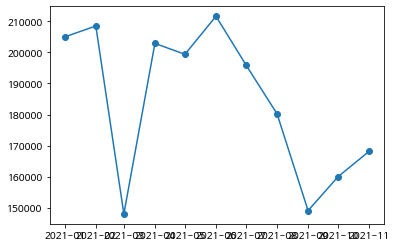

In [128]:
gu1= 월동평균2.query('동== "성수동1가"').sort_values('계약년월').reset_index()

display(월동평균3)
plt.plot(월동평균3['계약년월'],월동평균3['mean'],marker='o')



동      count  std           mean           min     max   
행당동    19     23646.457890  146394.736842  103000  195000    1
마장동    2      20152.543264  90750.000000   76500   105000    1
금호동4가  3      7211.102551   159000.000000  153000  167000    1
              17691.806013  155000.000000  136000  171000    1
       4      22108.576767  165425.000000  140000  193000    1
                                                            ..
옥수동    7      32771.757585  179785.714286  108000  209000    1
       8      18090.704006  175425.000000  144000  205000    1
       11     29146.417213  143818.181818  100000  181000    1
용답동    2      707.106781    89500.000000   89000   90000     1
금호동1가  2      28284.271247  154000.000000  134000  174000    1
Length: 103, dtype: int64

### 2021년 월별  성동구 25평형 거래 추이

'성수동1가'

'옥수동'

'금호동4가'

'성수동2가'

'금호동1가'

'금호동2가'

'상왕십리동'

'하왕십리동'

'행당동'

'금호동3가'

'응봉동'

'마장동'

'도선동'

'송정동'

'용답동'

'사근동'

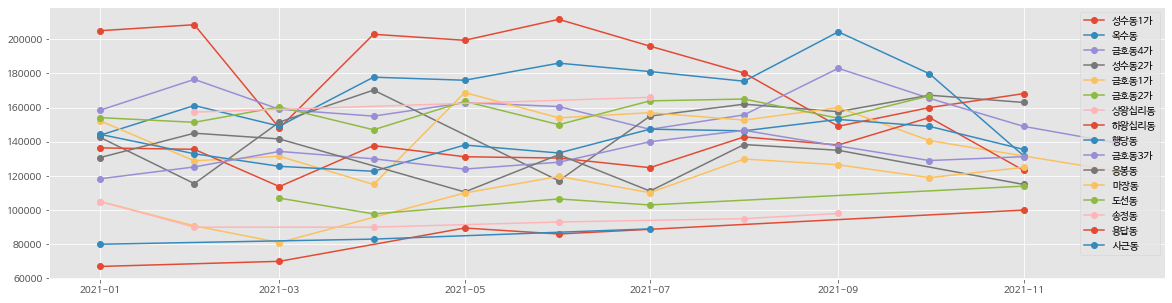

In [165]:
#drop_duplicates 을 제거한 data를 추출 한다. 동 명을 추출한다.
uniques = 월동평균2['동'].drop_duplicates().reset_index()
uniques
function_list = [ 'mean']
동단위월평균 = 전용면적25.groupby(['계약년월','동'])['금액'].agg(function_list).sort_values('mean', ascending=False).reset_index()
동단위월평균.set_axis

plt.style.use('ggplot')
fig= plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)


for x in uniques.values:
  display(x[1])
  querys= '동=="' +x[1]+'"'
  ##동단위 평균 거래량을 추출한다.
  gu1= 월동평균2.query(querys).sort_values('계약년월').reset_index()
  ax.plot(gu1['계약년월'],gu1['mean'], marker='o',label=x[1])


ax.legend(loc='best')
plt.show()